In [27]:
"""
PROYECTO: ANÁLISIS DE VENTAS DE PRODUCTOS TECNOLÓGICOS
Análisis exploratorio, limpieza de datos y modelo predictivo
"""

# ==================== INSTALACIÓN Y IMPORTACIÓN DE LIBRERÍAS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*60)
print("MONTANDO GOOGLE DRIVE")
print("="*60)

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

MONTANDO GOOGLE DRIVE
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:

# ==================== 1. CARGA DEL DATASET DESDE GOOGLE DRIVE ====================
print("\n" + "="*60)
print("CARGA DEL DATASET DESDE GOOGLE DRIVE")
print("="*60)

# Ruta del archivo en Google Drive
file_path = '/content/drive/MyDrive/Posgrado/Ciencia de Datos/Proyecto/Data.xlsx'

try:
    # Cargar el dataset desde Excel
    Data = pd.read_excel(file_path, sheet_name='Data')
    print(f"✅ Dataset cargado exitosamente desde Google Drive")
    print(f"📊 Dimensiones: {Data.shape[0]} filas y {Data.shape[1]} columnas")
    print(f"\nPrimeras 5 filas del dataset:")
    print(Data.head())
except FileNotFoundError:
    print("❌ ERROR: No se encontró el archivo 'Data.xlsx' en Google Drive")
    print("Por favor, verifica que el archivo esté en la raíz de 'Mi unidad'")
    print("Si está en una carpeta, actualiza la ruta: '/content/drive/MyDrive/Posgrado/Ciencia de Datos/Proyecto/Data.xlsx")
    raise
except Exception as e:
    print(f"❌ ERROR al cargar el archivo: {str(e)}")
    raise



CARGA DEL DATASET DESDE GOOGLE DRIVE
✅ Dataset cargado exitosamente desde Google Drive
📊 Dimensiones: 202290 filas y 17 columnas

Primeras 5 filas del dataset:
      Store                         Supplier        TELEPHONY   Color  \
0  L CENTRO  INGRAM MICRO MEXICO S A  DE C V  TELEFONIA LIBRE  BLACK    
1  L CENTRO  INGRAM MICRO MEXICO S A  DE C V  TELEFONIA LIBRE   GREEN   
2  L CENTRO  INGRAM MICRO MEXICO S A  DE C V  TELEFONIA LIBRE    BLUE   
3  L CENTRO  INGRAM MICRO MEXICO S A  DE C V  TELEFONIA LIBRE   PLATA   
4  L CENTRO  INGRAM MICRO MEXICO S A  DE C V  TELEFONIA LIBRE   GREEN   

                         Description  Month            Model    Brand  Memory  \
0     INFINIX NOTE 30, 256 GB, NEGRO  April  INFINIX NOTE 30  INFINIX  256 GB   
1      HONOR HONOR 90, 512 GB, VERDE  April         HONOR 90    HONOR  512 GB   
2  HONOR HONOR 90 LITE, 256 GB, AZUL  April    HONOR 90 LITE    HONOR  256 GB   
3           HONOR X8B, 512 GB, PLATA  April        HONOR X8B    HONOR  512 G

In [29]:
# ==================== 2. EXPLORACIÓN INICIAL DE DATOS ====================
print("\n" + "="*60)
print("EXPLORACIÓN INICIAL DE DATOS (EDA)")
print("="*60)

print("\n📋 Información del Dataset:")
print(Data.info())

print("\n📊 Estadísticas Descriptivas (Variables Numéricas):")
print(Data.describe())

print("\n🔍 Valores Nulos por Columna:")
null_values = Data.isnull().sum()
if null_values.sum() > 0:
    print(null_values[null_values > 0])
else:
    print("✅ No hay valores nulos en el dataset")

print("\n📝 Tipos de Datos:")
print(Data.dtypes)

print("\n🔢 Valores Únicos por Columna:")
for col in Data.columns:
    print(f"{col}: {Data[col].nunique()} valores únicos")




EXPLORACIÓN INICIAL DE DATOS (EDA)

📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202290 entries, 0 to 202289
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   202290 non-null  object 
 1   Supplier                202290 non-null  object 
 2   TELEPHONY               202290 non-null  object 
 3   Color                   202290 non-null  object 
 4   Description             202290 non-null  object 
 5   Month                   202290 non-null  object 
 6   Model                   202290 non-null  object 
 7   Brand                   202290 non-null  object 
 8   Memory                  202290 non-null  object 
 9   Status                  202290 non-null  object 
 10  Season                  202290 non-null  object 
 11  Physical Units          202290 non-null  int64  
 12  Physical Sale           202290 non-null  float64
 13  Virtual Un

In [30]:
# ==================== 3. DATA WRANGLING Y LIMPIEZA ====================
print("\n" + "="*60)
print("DATA WRANGLING Y LIMPIEZA")
print("="*60)

# Verificar y manejar valores nulos
print("\n1️⃣ MANEJO DE VALORES NULOS:")
null_count = Data.isnull().sum()
if null_count.sum() > 0:
    print("Se encontraron valores nulos:")
    print(null_count[null_count > 0])

    # Estrategia de imputación por tipo de columna
    for col in Data.columns:
        if Data[col].isnull().sum() > 0:
            if Data[col].dtype in ['int64', 'float64']:
                # Para variables numéricas, usar la mediana
                median_value = Data[col].median()
                Data[col].fillna(median_value, inplace=True)
                print(f"   ✅ '{col}': Imputados con mediana ({median_value})")
            else:
                # Para variables categóricas, usar la moda
                mode_value = Data[col].mode()[0]
                Data[col].fillna(mode_value, inplace=True)
                print(f"   ✅ '{col}': Imputados con moda ({mode_value})")
else:
    print("✅ No se encontraron valores nulos en el dataset")

print("\n2️⃣ VERIFICACIÓN DE DUPLICADOS:")
duplicates = Data.duplicated().sum()
print(f"   Duplicados encontrados: {duplicates}")
if duplicates > 0:
    Data.drop_duplicates(inplace=True)
    print(f"   ✅ {duplicates} duplicados eliminados")
else:
    print("   ✅ No hay duplicados")

print("\n3️⃣ CONVERSIÓN Y VALIDACIÓN DE TIPOS DE DATOS:")
# Asegurar que las columnas numéricas sean del tipo correcto
numeric_cols = ['Physical Units', 'Virtual Units', 'Physical Sale', 'Virtual Sale']
for col in numeric_cols:
    if col in Data.columns:
        Data[col] = pd.to_numeric(Data[col], errors='coerce')
        print(f"   ✅ '{col}' convertido a numérico")

# Eliminar filas con valores nulos en columnas críticas después de la conversión
Data.dropna(subset=numeric_cols, inplace=True)

print("\n4️⃣ VALIDACIÓN DE VALORES NEGATIVOS:")
for col in numeric_cols:
    if col in Data.columns:
        negative_count = (Data[col] < 0).sum()
        if negative_count > 0:
            print(f"   ⚠️ '{col}' tiene {negative_count} valores negativos - Se eliminarán")
            Data = Data[Data[col] >= 0]
        else:
            print(f"   ✅ '{col}': Sin valores negativos")

print("\n5️⃣ RESUMEN DESPUÉS DE LIMPIEZA:")
print(f"   Registros finales: {Data.shape[0]}")
print(f"   Columnas: {Data.shape[1]}")
print(f"   Valores nulos restantes: {Data.isnull().sum().sum()}")




DATA WRANGLING Y LIMPIEZA

1️⃣ MANEJO DE VALORES NULOS:
✅ No se encontraron valores nulos en el dataset

2️⃣ VERIFICACIÓN DE DUPLICADOS:
   Duplicados encontrados: 1215
   ✅ 1215 duplicados eliminados

3️⃣ CONVERSIÓN Y VALIDACIÓN DE TIPOS DE DATOS:
   ✅ 'Physical Units' convertido a numérico
   ✅ 'Virtual Units' convertido a numérico
   ✅ 'Physical Sale' convertido a numérico
   ✅ 'Virtual Sale' convertido a numérico

4️⃣ VALIDACIÓN DE VALORES NEGATIVOS:
   ⚠️ 'Physical Units' tiene 3440 valores negativos - Se eliminarán
   ⚠️ 'Virtual Units' tiene 2280 valores negativos - Se eliminarán
   ⚠️ 'Physical Sale' tiene 753 valores negativos - Se eliminarán
   ⚠️ 'Virtual Sale' tiene 4219 valores negativos - Se eliminarán

5️⃣ RESUMEN DESPUÉS DE LIMPIEZA:
   Registros finales: 190383
   Columnas: 17
   Valores nulos restantes: 0


In [31]:
# ==================== 4. ANÁLISIS EXPLORATORIO DE DATOS (EDA) ====================
print("\n" + "="*60)
print("ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

# Análisis de ventas totales
total_physical_units = Data['Physical Units'].sum()
total_virtual_units = Data['Virtual Units'].sum()
total_physical_sales = Data['Physical Sale'].sum()
total_virtual_sales = Data['Virtual Sale'].sum()

print(f"\n💰 VENTAS TOTALES:")
print(f"{'='*50}")
print(f"Physical Units:    {total_physical_units:>15,}")
print(f"Virtual Units:     {total_virtual_units:>15,}")
print(f"Physical Sales:    ${total_physical_sales:>15,.2f}")
print(f"Virtual Sales:     ${total_virtual_sales:>15,.2f}")
print(f"TOTAL SALES:       ${(total_physical_sales + total_virtual_sales):>15,.2f}")
print(f"{'='*50}")

winner = 'VIRTUALES' if total_virtual_units > total_physical_units else 'FÍSICAS'
difference = abs(total_virtual_units - total_physical_units)
print(f"\n🏆 Se vendieron más unidades {winner}")
print(f"   Diferencia: {difference:,} unidades")

# Análisis por marca
print("\n" + "="*60)
print("ANÁLISIS POR MARCA")
print("="*60)
brand_sales = Data.groupby('Brand').agg({
    'Physical Units': 'sum',
    'Virtual Units': 'sum',
    'Physical Sale': 'sum',
    'Virtual Sale': 'sum'
}).sort_values('Physical Sale', ascending=False)
print(brand_sales)

# Análisis por rango de precio
print("\n" + "="*60)
print("ANÁLISIS POR RANGO DE PRECIO (FÍSICO)")
print("="*60)
price_analysis = Data.groupby('Price Range (Physical)').agg({
    'Physical Sale': 'sum',
    'Physical Units': 'sum'
}).sort_values('Physical Sale', ascending=False)
print(price_analysis)
print(f"\n🏆 Rango de mayor venta: {price_analysis.index[0]}")
print(f"   Ingresos: ${price_analysis.iloc[0]['Physical Sale']:,.2f}")

# Análisis por tienda
print("\n" + "="*60)
print("ANÁLISIS POR TIENDA")
print("="*60)
store_sales = Data.groupby('Store').agg({
    'Physical Sale': 'sum',
    'Virtual Sale': 'sum'
}).sort_values('Physical Sale', ascending=False)
print(store_sales)

# Modelo más vendido por mes
print("\n" + "="*60)
print("MODELO MÁS VENDIDO POR MES")
print("="*60)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

available_months = Data['Month'].unique()
for month in month_order:
    if month in available_months:
        month_data = Data[Data['Month'] == month]
        if not month_data.empty:
            model_sales = month_data.groupby('Model')['Physical Units'].sum()
            top_model = model_sales.idxmax()
            top_units = model_sales.max()
            print(f"📅 {month:12s}: {top_model} ({top_units:,} unidades)")




ANÁLISIS EXPLORATORIO DE DATOS

💰 VENTAS TOTALES:
Physical Units:            401,331
Virtual Units:             105,034
Physical Sales:    $2,981,580,420.86
Virtual Sales:     $ 660,045,431.55
TOTAL SALES:       $3,641,625,852.41

🏆 Se vendieron más unidades FÍSICAS
   Diferencia: 296,297 unidades

ANÁLISIS POR MARCA
              Physical Units  Virtual Units  Physical Sale  Virtual Sale
Brand                                                                   
APPLE                  62356          15791   1.047958e+09  2.202293e+08
SAMSUNG               133906          35724   1.019768e+09  2.428260e+08
MOTOROLA               57303          23169   2.271344e+08  8.248095e+07
HONOR                  37680           5196   1.801989e+08  1.973224e+07
XIAOMI                 45597          17036   1.654255e+08  5.773311e+07
OPPO                   23168           3222   1.263454e+08  1.715450e+07
VIVO                   19868            418   9.050417e+07  2.292046e+06
HUAWEI                 


GENERANDO VISUALIZACIONES
✅ Visualizaciones guardadas como 'eda_visualizations.png'


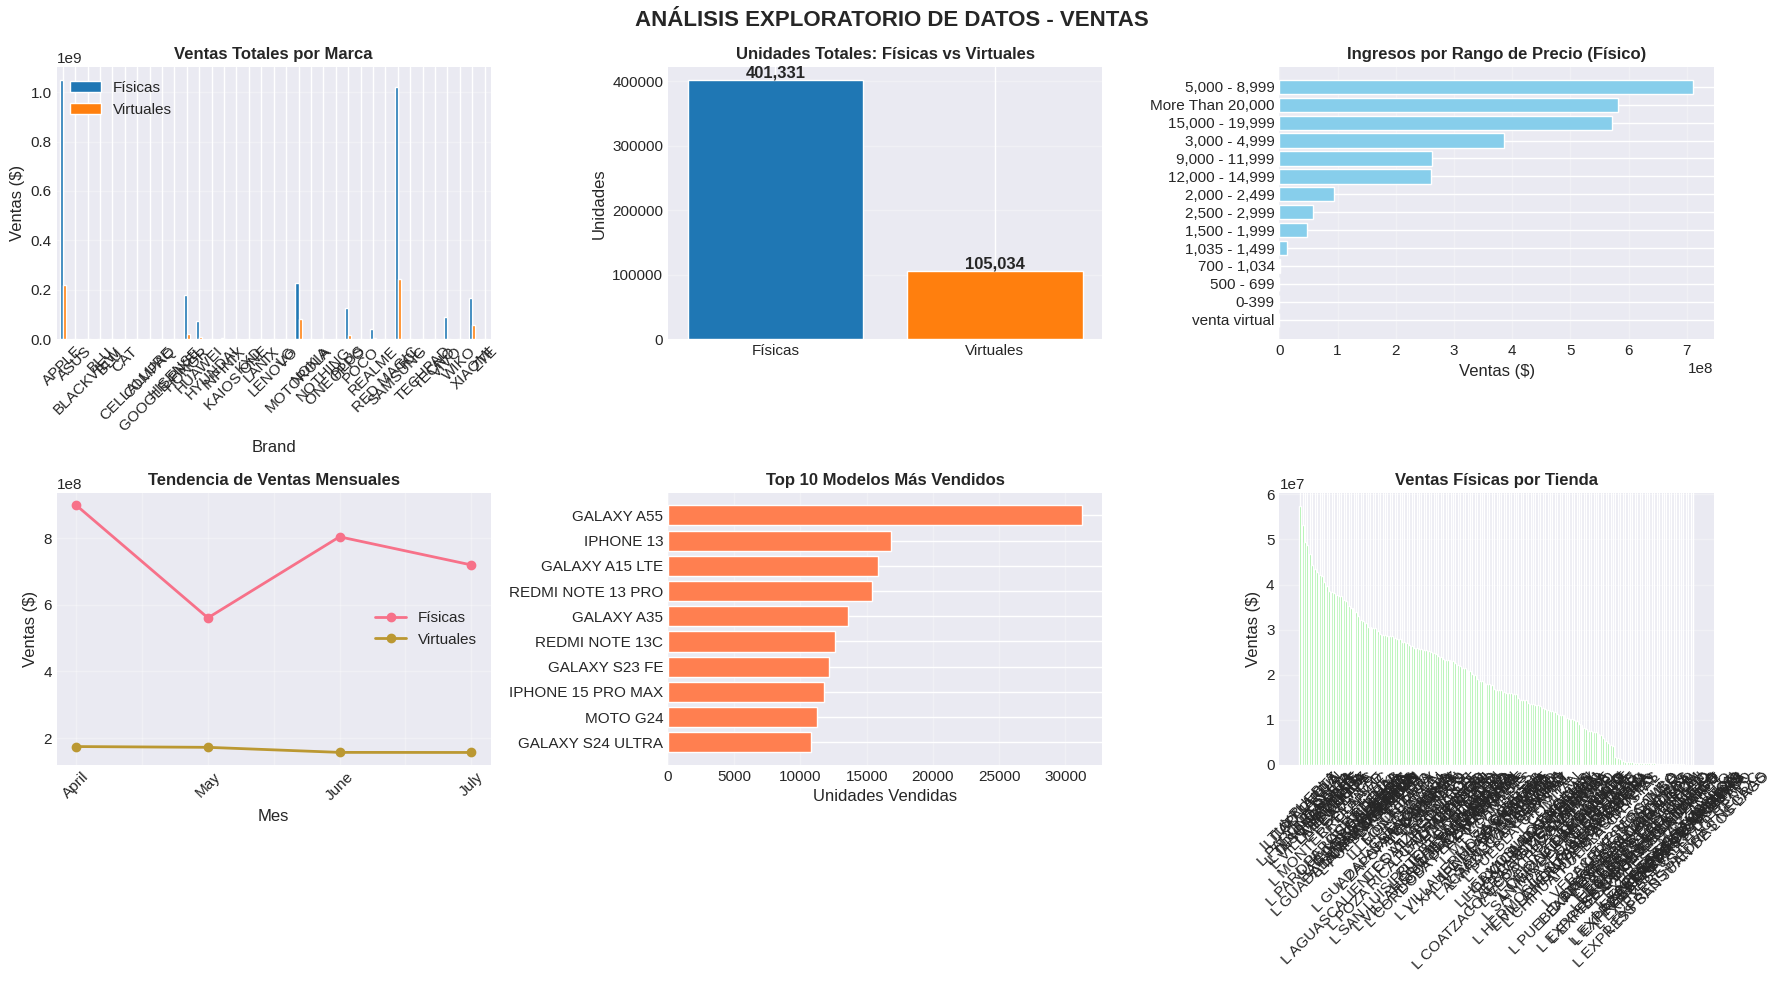

In [32]:
# ==================== 5. VISUALIZACIONES ====================
print("\n" + "="*60)
print("GENERANDO VISUALIZACIONES")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('ANÁLISIS EXPLORATORIO DE DATOS - VENTAS', fontsize=16, fontweight='bold')

# 1. Ventas por marca
brand_total = Data.groupby('Brand')[['Physical Sale', 'Virtual Sale']].sum()
brand_total.plot(kind='bar', ax=axes[0, 0], rot=45, color=['#1f77b4', '#ff7f0e'])
axes[0, 0].set_title('Ventas Totales por Marca', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Ventas ($)')
axes[0, 0].legend(['Físicas', 'Virtuales'])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Distribución de unidades físicas vs virtuales
units_comparison = pd.DataFrame({
    'Tipo': ['Físicas', 'Virtuales'],
    'Unidades': [total_physical_units, total_virtual_units]
})
axes[0, 1].bar(units_comparison['Tipo'], units_comparison['Unidades'],
               color=['#1f77b4', '#ff7f0e'])
axes[0, 1].set_title('Unidades Totales: Físicas vs Virtuales', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Unidades')
for i, v in enumerate(units_comparison['Unidades']):
    axes[0, 1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Ventas por rango de precio
price_range_sales = Data.groupby('Price Range (Physical)')['Physical Sale'].sum().sort_values(ascending=True)
axes[0, 2].barh(price_range_sales.index, price_range_sales.values, color='skyblue')
axes[0, 2].set_title('Ingresos por Rango de Precio (Físico)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Ventas ($)')
axes[0, 2].grid(axis='x', alpha=0.3)

# 4. Ventas mensuales
month_sales = Data.groupby('Month')[['Physical Sale', 'Virtual Sale']].sum()
if len(month_sales) > 0:
    # Reordenar por meses disponibles
    available_ordered = [m for m in month_order if m in month_sales.index]
    month_sales = month_sales.reindex(available_ordered)
    month_sales.plot(kind='line', ax=axes[1, 0], marker='o', linewidth=2)
    axes[1, 0].set_title('Tendencia de Ventas Mensuales', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Ventas ($)')
    axes[1, 0].set_xlabel('Mes')
    axes[1, 0].legend(['Físicas', 'Virtuales'])
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(alpha=0.3)

# 5. Top 10 modelos más vendidos
top_models = Data.groupby('Model')['Physical Units'].sum().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(top_models)), top_models.values, color='coral')
axes[1, 1].set_yticks(range(len(top_models)))
axes[1, 1].set_yticklabels(top_models.index)
axes[1, 1].set_title('Top 10 Modelos Más Vendidos', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Unidades Vendidas')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

# 6. Distribución de ventas por tienda
store_total = Data.groupby('Store')['Physical Sale'].sum().sort_values(ascending=False)
axes[1, 2].bar(range(len(store_total)), store_total.values, color='lightgreen')
axes[1, 2].set_xticks(range(len(store_total)))
axes[1, 2].set_xticklabels(store_total.index, rotation=45)
axes[1, 2].set_title('Ventas Físicas por Tienda', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Ventas ($)')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
print("✅ Visualizaciones guardadas como 'eda_visualizations.png'")
plt.show()




MODELO DE MACHINE LEARNING - RANDOM FOREST REGRESSOR

📚 JUSTIFICACIÓN DEL MODELO:
------------------------------------------------------------

Random Forest Regressor fue seleccionado por:

1. ✅ Versatilidad: Maneja variables categóricas y numéricas sin normalización
2. ✅ Robustez: Resistente a outliers y datos ruidosos
3. ✅ No Linealidad: Captura relaciones complejas entre variables
4. ✅ Interpretabilidad: Proporciona importancia de características
5. ✅ Rendimiento: Balance entre precisión y velocidad
6. ✅ Objetivo: Predecir las ventas físicas basándose en características


🔧 Preparación de datos para el modelo...
✅ Variables seleccionadas: 9
   Features: Store, Brand, Memory, TELEPHONY, Price Range (Physical), Status, Physical Units, Season, Description

🔄 Codificando variables categóricas...
   ✅ 'Store' codificado (163 categorías)
   ✅ 'Brand' codificado (35 categorías)
   ✅ 'Memory' codificado (10 categorías)
   ✅ 'TELEPHONY' codificado (5 categorías)
   ✅ 'Price Range (Physical

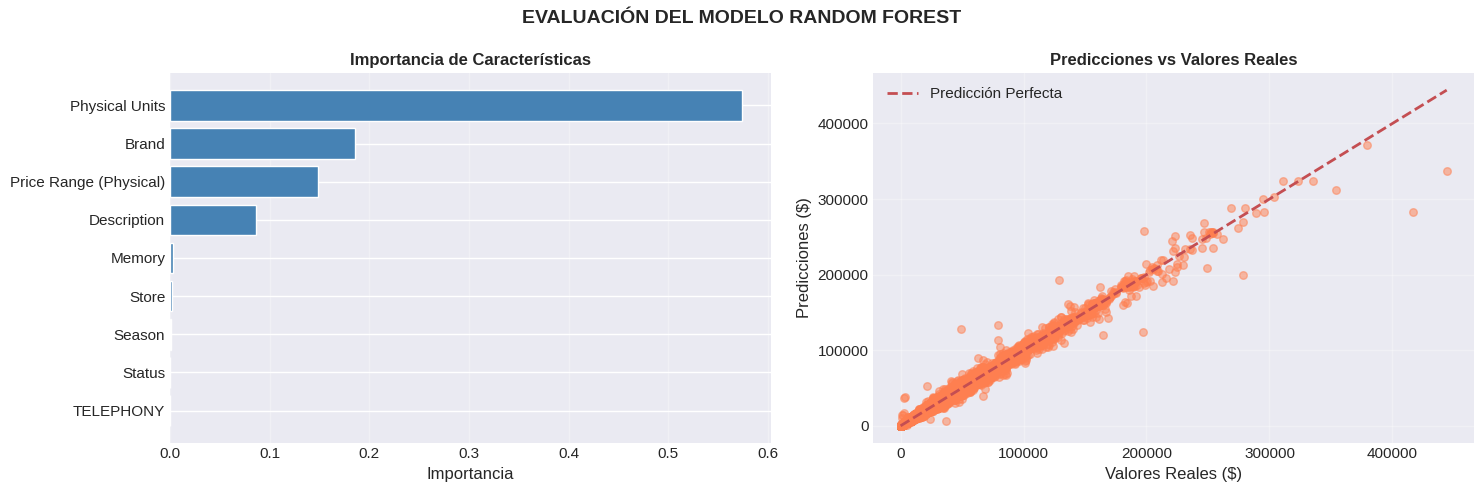

In [40]:
# ==================== 6. MODELO DE MACHINE LEARNING ====================
print("\n" + "="*60)
print("MODELO DE MACHINE LEARNING - RANDOM FOREST REGRESSOR")
print("="*60)

print("\n📚 JUSTIFICACIÓN DEL MODELO:")
print("-" * 60)
print("""
Random Forest Regressor fue seleccionado por:

1. ✅ Versatilidad: Maneja variables categóricas y numéricas sin normalización
2. ✅ Robustez: Resistente a outliers y datos ruidosos
3. ✅ No Linealidad: Captura relaciones complejas entre variables
4. ✅ Interpretabilidad: Proporciona importancia de características
5. ✅ Rendimiento: Balance entre precisión y velocidad
6. ✅ Objetivo: Predecir las ventas físicas basándose en características

""")

# Preparación de datos para el modelo
print("🔧 Preparación de datos para el modelo...")

# Seleccionar características para el modelo
feature_columns = ['Store', 'Brand', 'Memory', 'TELEPHONY', 'Price Range (Physical)',
                   'Status', 'Physical Units', 'Season', 'Description']

# Verificar que todas las columnas existan
available_features = [col for col in feature_columns if col in Data.columns]
if len(available_features) < len(feature_columns):
    missing = set(feature_columns) - set(available_features)
    print(f"⚠️ Advertencia: Columnas no encontradas: {missing}")
    feature_columns = available_features

X = Data[feature_columns].copy()
y = Data['Physical Sale'].copy()

print(f"✅ Variables seleccionadas: {len(feature_columns)}")
print(f"   Features: {', '.join(feature_columns)}")

# Codificación de variables categóricas
print("\n🔄 Codificando variables categóricas...")
label_encoders = {}
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"   ✅ '{col}' codificado ({X[col].nunique()} categorías)")

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 División de datos:")
print(f"   Entrenamiento: {X_train.shape[0]} registros ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"   Prueba:        {X_test.shape[0]} registros ({(X_test.shape[0]/len(X))*100:.1f}%)")

# Entrenamiento del modelo
print("\n🚀 Entrenando Random Forest Regressor...")
print("   (Esto puede tomar unos momentos...)")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
rf_model.fit(X_train, y_train)

print("✅ Modelo entrenado exitosamente")

# Predicciones
print("\n🔮 Realizando predicciones...")
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*60)
print("📊 RESULTADOS DEL MODELO")
print("="*60)
print(f"Mean Absolute Error (MAE):      ${mae:>15,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:>15,.2f}")
print(f"R² Score:                       {r2:>15.4f}")
print("="*60)
print(f"\n💡 Interpretación:")
print(f"   El modelo explica el {r2*100:.2f}% de la varianza en las ventas físicas")
print(f"   Error promedio de predicción: ±${mae:,.2f}")

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("🎯 IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)
print(feature_importance.to_string(index=False))

# Visualizaciones del modelo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('EVALUACIÓN DEL MODELO RANDOM FOREST', fontsize=14, fontweight='bold')

# 1. Importancia de características
axes[0].barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
axes[0].set_xlabel('Importancia')
axes[0].set_title('Importancia de Características', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# 2. Predicciones vs valores reales
axes[1].scatter(y_test, y_pred, alpha=0.5, s=30, color='coral')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valores Reales ($)')
axes[1].set_ylabel('Predicciones ($)')
axes[1].set_title('Predicciones vs Valores Reales', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✅ Gráficos del modelo guardados como 'model_evaluation.png'")
plt.show()



In [41]:
# ==================== 7. RESPUESTAS A PREGUNTAS DE NEGOCIO ====================
print("\n" + "="*60)
print("📋 RESPUESTAS A PREGUNTAS CLAVE DE NEGOCIO")
print("="*60)

print("\n1️⃣ ¿Cuál es el modelo más vendido por mes?")
print("-" * 60)
for month in month_order:
    if month in available_months:
        month_data = Data[Data['Month'] == month]
        if not month_data.empty:
            model_sales = month_data.groupby('Model')['Physical Units'].sum()
            top_model = model_sales.idxmax()
            top_units = model_sales.max()
            print(f"   {month:12s}: {top_model} ({top_units:,} unidades)")

print(f"\n2️⃣ ¿Se vendieron más Virtual Units o Physical Units en total?")
print("-" * 60)
print(f"   Physical Units: {total_physical_units:>15,}")
print(f"   Virtual Units:  {total_virtual_units:>15,}")
print(f"   Diferencia:     {difference:>15,} unidades")
print(f"\n   🏆 GANADOR: Se vendieron más unidades {winner}")

print("\n3️⃣ ¿Qué rangos de precio son los de mayor venta?")
print("-" * 60)
print("\n   Rangos de Precio Físicos (ordenados por ingresos):")
print(price_analysis.to_string())
print(f"\n   🏆 Mayor venta: {price_analysis.index[0]}")
print(f"      Ingresos: ${price_analysis.iloc[0]['Physical Sale']:,.2f}")
print(f"      Unidades: {price_analysis.iloc[0]['Physical Units']:,.0f}")




📋 RESPUESTAS A PREGUNTAS CLAVE DE NEGOCIO

1️⃣ ¿Cuál es el modelo más vendido por mes?
------------------------------------------------------------
   April       : GALAXY A55 (10,665 unidades)
   May         : GALAXY A55 (5,409 unidades)
   June        : GALAXY A55 (6,403 unidades)
   July        : GALAXY A55 (8,744 unidades)

2️⃣ ¿Se vendieron más Virtual Units o Physical Units en total?
------------------------------------------------------------
   Physical Units:         401,331
   Virtual Units:          105,034
   Diferencia:             296,297 unidades

   🏆 GANADOR: Se vendieron más unidades FÍSICAS

3️⃣ ¿Qué rangos de precio son los de mayor venta?
------------------------------------------------------------

   Rangos de Precio Físicos (ordenados por ingresos):
                        Physical Sale  Physical Units
Price Range (Physical)                               
5,000 - 8,999            7.109617e+08          107350
More Than 20,000         5.810471e+08           25164

In [42]:
# ==================== 8. GUARDAR ARCHIVOS PARA STREAMLIT ====================
print("\n" + "="*60)
print("💾 GUARDANDO ARCHIVOS PARA STREAMLIT")
print("="*60)

import pickle

try:
    # Guardar modelo
    with open('rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    print("✅ Modelo guardado: rf_model.pkl")

    # Guardar encoders
    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)
    print("✅ Encoders guardados: label_encoders.pkl")

    # Guardar datos limpios
    Data.to_csv('cleaned_data.csv', index=False)
    print("✅ Datos limpios guardados: cleaned_data.csv")

    # Guardar también en formato Excel
    Data.to_excel('cleaned_data.xlsx', sheet_name='Data', index=False)
    print("✅ Datos limpios guardados: cleaned_data.xlsx")

    print("\n📁 Archivos listos para usar en Streamlit:")
    print("   - rf_model.pkl (modelo entrenado)")
    print("   - label_encoders.pkl (encoders para predicciones)")
    print("   - cleaned_data.csv (datos limpios)")
    print("   - cleaned_data.xlsx (datos limpios en Excel)")

except Exception as e:
    print(f"❌ Error al guardar archivos: {str(e)}")

print("\n" + "="*60)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*60)
print("\n🎉 Todos los análisis han sido completados.")
print("📊 Visualizaciones generadas y guardadas.")
print("🤖 Modelo de ML entrenado y evaluado.")
print("💾 Archivos listos para el dashboard de Streamlit.")


💾 GUARDANDO ARCHIVOS PARA STREAMLIT
✅ Modelo guardado: rf_model.pkl
✅ Encoders guardados: label_encoders.pkl
✅ Datos limpios guardados: cleaned_data.csv
✅ Datos limpios guardados: cleaned_data.xlsx

📁 Archivos listos para usar en Streamlit:
   - rf_model.pkl (modelo entrenado)
   - label_encoders.pkl (encoders para predicciones)
   - cleaned_data.csv (datos limpios)
   - cleaned_data.xlsx (datos limpios en Excel)

✅ ANÁLISIS COMPLETADO EXITOSAMENTE

🎉 Todos los análisis han sido completados.
📊 Visualizaciones generadas y guardadas.
🤖 Modelo de ML entrenado y evaluado.
💾 Archivos listos para el dashboard de Streamlit.


In [ ]:
"""
CONFIGURACIÓN DE STREAMLIT EN GOOGLE COLAB CON NGROK
Ejecuta este código después del análisis principal
"""

# ==================== INSTALACIÓN DE DEPENDENCIAS ====================
print("📦 Instalando dependencias necesarias...")

!pip install -q streamlit plotly pyngrok

print("✅ Instalación completada")

# ==================== CREAR ARCHIVO DE STREAMLIT ====================
print("\n📝 Creando archivo de aplicación Streamlit...")

streamlit_app = '''"""
DASHBOARD INTERACTIVO DE ANÁLISIS DE VENTAS
Aplicación Streamlit para visualización de datos y predicciones
"""

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle
import os

# Configuración de la página
st.set_page_config(
    page_title="Dashboard de Ventas Tecnológicas",
    page_icon="📱",
    layout="wide",
    initial_sidebar_state="expanded"
)

# CSS personalizado
st.markdown("""
<style>
    .main-header {
        font-size: 42px;
        font-weight: bold;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 30px;
    }
    .sub-header {
        font-size: 24px;
        font-weight: bold;
        color: #2c3e50;
        margin-top: 20px;
    }
    .stMetric {
        background-color: white;
        padding: 15px;
        border-radius: 8px;
        box-shadow: 1px 1px 3px rgba(0,0,0,0.1);
    }
</style>
""", unsafe_allow_html=True)

# Función para cargar datos
@st.cache_data
def load_data():
    try:
        data = pd.read_csv('cleaned_data.csv')
        return data
    except:
        try:
            data = pd.read_excel('Data.xlsx', sheet_name='Data')
            return data
        except:
            st.error("❌ No se pudo cargar el dataset")
            return None

# Función para cargar el modelo
@st.cache_resource
def load_model():
    try:
        with open('rf_model.pkl', 'rb') as f:
            model = pickle.load(f)
        with open('label_encoders.pkl', 'rb') as f:
            encoders = pickle.load(f)
        return model, encoders
    except:
        return None, None

# Cargar datos
Data = load_data()
if Data is None:
    st.stop()

# Cargar modelo
rf_model, label_encoders = load_model()

# ==================== SIDEBAR - FILTROS ====================
st.sidebar.title("🎛️ Filtros Interactivos")

# Filtros
selected_stores = st.sidebar.multiselect(
    "Tienda",
    options=Data['Store'].unique().tolist(),
    default=Data['Store'].unique().tolist()
)

selected_brands = st.sidebar.multiselect(
    "Marca",
    options=Data['Brand'].unique().tolist(),
    default=Data['Brand'].unique().tolist()
)

selected_months = st.sidebar.multiselect(
    "Mes",
    options=['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December'],
    default=Data['Month'].unique().tolist()
)

selected_status = st.sidebar.multiselect(
    "Estado",
    options=Data['Status'].unique().tolist(),
    default=Data['Status'].unique().tolist()
)

selected_memory = st.sidebar.multiselect(
    "Memoria",
    options=Data['Memory'].unique().tolist(),
    default=Data['Memory'].unique().tolist()
)

selected_telephony = st.sidebar.multiselect(
    "Tecnología",
    options=Data['TELEPHONY'].unique().tolist(),
    default=Data['TELEPHONY'].unique().tolist()
)

# Aplicar filtros
filtered_data = Data[
    (Data['Store'].isin(selected_stores)) &
    (Data['Brand'].isin(selected_brands)) &
    (Data['Month'].isin(selected_months)) &
    (Data['Status'].isin(selected_status)) &
    (Data['Memory'].isin(selected_memory)) &
    (Data['TELEPHONY'].isin(selected_telephony))
]

st.sidebar.markdown("---")
st.sidebar.info(f"📊 **Registros filtrados:** {len(filtered_data):,} de {len(Data):,}")

# ==================== PÁGINA PRINCIPAL ====================

# Título principal
st.markdown('<p class="main-header">📱 Dashboard de Análisis de Ventas Tecnológicas</p>', unsafe_allow_html=True)

# Crear tabs
tab1, tab2, tab3, tab4, tab5 = st.tabs([
    "🏠 Inicio",
    "📊 KPIs y Métricas",
    "📈 Visualizaciones",
    "❓ Preguntas de Negocio",
    "🤖 Predicciones ML"
])

# ==================== TAB 1: INICIO ====================
with tab1:
    st.markdown("## 🎯 Descripción del Proyecto")

    col1, col2 = st.columns([2, 1])

    with col1:
        st.markdown(f"""
        ### Contexto del Problema

        En la industria de ventas de productos tecnológicos, especialmente dispositivos móviles,
        es fundamental entender los patrones de compra, preferencias de clientes y tendencias
        del mercado para optimizar el inventario, estrategias de marketing y maximizar ingresos.

        ### Objetivos del Análisis

        Este proyecto tiene como objetivo proporcionar insights accionables mediante:

        1. **Análisis Exploratorio de Datos (EDA)**: Comprensión profunda de patrones de ventas
        2. **Identificación de KPIs**: Métricas clave para monitorear el desempeño del negocio
        3. **Modelo Predictivo**: Predicción de ventas físicas utilizando Random Forest
        4. **Visualización Interactiva**: Dashboard para explorar datos en tiempo real

        ### Dataset

        El análisis se basa en un dataset de **{len(Data):,} registros** que incluye información sobre:
        - Ventas físicas y virtuales
        - Múltiples tiendas, marcas y modelos
        - Características técnicas de productos
        - Tendencias mensuales y estacionales
        """)

    with col2:
        st.markdown("### 📋 Características del Dataset")
        st.info(f"""
        **Registros totales:** {len(Data):,}

        **Columnas:** {len(Data.columns)}

        **Tiendas:** {Data['Store'].nunique()}

        **Marcas:** {Data['Brand'].nunique()}

        **Modelos:** {Data['Model'].nunique()}

        **Período:** {len(Data['Month'].unique())} meses
        """)

        st.success("""
        ✅ Datos limpios y procesados

        ✅ Modelo ML entrenado

        ✅ Dashboard interactivo
        """)

# ==================== TAB 2: KPIs ====================
with tab2:
    st.markdown('<p class="sub-header">📊 Indicadores Clave de Desempeño (KPIs)</p>', unsafe_allow_html=True)

    # Calcular KPIs
    total_physical_units = filtered_data['Physical Units'].sum()
    total_virtual_units = filtered_data['Virtual Units'].sum()
    total_physical_sales = filtered_data['Physical Sale'].sum()
    total_virtual_sales = filtered_data['Virtual Sale'].sum()
    total_sales = total_physical_sales + total_virtual_sales
    avg_ticket_physical = filtered_data['Physical Sale'].mean()
    avg_ticket_virtual = filtered_data['Virtual Sale'].mean()

    # Fila 1 de métricas
    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.metric(
            label="💰 Ventas Totales",
            value=f"${total_sales:,.0f}",
            delta=f"{(total_sales/Data['Physical Sale'].sum()*100):.1f}% del total"
        )

    with col2:
        st.metric(
            label="🏪 Ventas Físicas",
            value=f"${total_physical_sales:,.0f}",
            delta=f"{total_physical_units:,} unidades"
        )

    with col3:
        st.metric(
            label="💻 Ventas Virtuales",
            value=f"${total_virtual_sales:,.0f}",
            delta=f"{total_virtual_units:,} unidades"
        )

    with col4:
        st.metric(
            label="📦 Total Unidades",
            value=f"{total_physical_units + total_virtual_units:,}",
            delta=f"Promedio: {(total_physical_units + total_virtual_units)/len(filtered_data):.1f}"
        )

    st.markdown("---")

    # Fila 2 de métricas
    col5, col6, col7, col8 = st.columns(4)

    with col5:
        st.metric(
            label="🎫 Ticket Promedio (Físico)",
            value=f"${avg_ticket_physical:,.0f}",
            delta="Por venta"
        )

    with col6:
        st.metric(
            label="🎫 Ticket Promedio (Virtual)",
            value=f"${avg_ticket_virtual:,.0f}",
            delta="Por venta"
        )

    with col7:
        top_brand = filtered_data.groupby('Brand')['Physical Sale'].sum().idxmax()
        st.metric(
            label="🏆 Marca Líder",
            value=top_brand,
            delta="Por ventas físicas"
        )

    with col8:
        top_store = filtered_data.groupby('Store')['Physical Sale'].sum().idxmax()
        st.metric(
            label="🏪 Tienda Top",
            value=top_store,
            delta="Mayor ingreso"
        )

    st.markdown("---")

    # Gráficos de KPIs
    col_left, col_right = st.columns(2)

    with col_left:
        fig_comparison = go.Figure()
        fig_comparison.add_trace(go.Bar(
            name='Unidades',
            x=['Físicas', 'Virtuales'],
            y=[total_physical_units, total_virtual_units],
            marker_color=['#1f77b4', '#ff7f0e']
        ))
        fig_comparison.update_layout(
            title="Comparación: Unidades Físicas vs Virtuales",
            height=400,
            showlegend=False
        )
        st.plotly_chart(fig_comparison, use_container_width=True)

    with col_right:
        fig_pie = go.Figure(data=[go.Pie(
            labels=['Ventas Físicas', 'Ventas Virtuales'],
            values=[total_physical_sales, total_virtual_sales],
            hole=0.4,
            marker_colors=['#1f77b4', '#ff7f0e']
        )])
        fig_pie.update_layout(
            title="Distribución de Ingresos por Canal",
            height=400
        )
        st.plotly_chart(fig_pie, use_container_width=True)

# ==================== TAB 3: VISUALIZACIONES ====================
with tab3:
    st.markdown('<p class="sub-header">📈 Visualizaciones Interactivas</p>', unsafe_allow_html=True)

    # Visualización 1: Ventas por Marca
    st.markdown("### 1️⃣ Ventas por Marca")
    brand_sales = filtered_data.groupby('Brand').agg({
        'Physical Sale': 'sum',
        'Virtual Sale': 'sum'
    }).reset_index()

    fig_brands = go.Figure()
    fig_brands.add_trace(go.Bar(
        name='Ventas Físicas',
        x=brand_sales['Brand'],
        y=brand_sales['Physical Sale'],
        marker_color='#1f77b4'
    ))
    fig_brands.add_trace(go.Bar(
        name='Ventas Virtuales',
        x=brand_sales['Brand'],
        y=brand_sales['Virtual Sale'],
        marker_color='#ff7f0e'
    ))
    fig_brands.update_layout(
        barmode='group',
        title="Comparación de Ventas Físicas y Virtuales por Marca",
        xaxis_title="Marca",
        yaxis_title="Ventas ($)",
        height=500
    )
    st.plotly_chart(fig_brands, use_container_width=True)

    # Visualización 2: Tendencia Mensual
    st.markdown("### 2️⃣ Tendencia de Ventas Mensuales")
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_sales = filtered_data.groupby('Month').agg({
        'Physical Sale': 'sum',
        'Virtual Sale': 'sum'
    }).reindex(month_order).reset_index()

    fig_monthly = go.Figure()
    fig_monthly.add_trace(go.Scatter(
        x=monthly_sales['Month'],
        y=monthly_sales['Physical Sale'],
        mode='lines+markers',
        name='Ventas Físicas',
        line=dict(color='#1f77b4', width=3),
        marker=dict(size=8)
    ))
    fig_monthly.add_trace(go.Scatter(
        x=monthly_sales['Month'],
        y=monthly_sales['Virtual Sale'],
        mode='lines+markers',
        name='Ventas Virtuales',
        line=dict(color='#ff7f0e', width=3),
        marker=dict(size=8)
    ))
    fig_monthly.update_layout(
        title="Evolución de Ventas a lo Largo del Año",
        xaxis_title="Mes",
        yaxis_title="Ventas ($)",
        height=500,
        hovermode='x unified'
    )
    st.plotly_chart(fig_monthly, use_container_width=True)

    # Visualización 3: Distribución de Rangos de Precio
    st.markdown("### 3️⃣ Análisis de Rangos de Precio")

    col1, col2 = st.columns(2)

    with col1:
        price_physical = filtered_data.groupby('Price Range (Physical)')['Physical Sale'].sum().reset_index()
        fig_price_physical = px.bar(
            price_physical,
            x='Price Range (Physical)',
            y='Physical Sale',
            title="Ingresos por Rango de Precio (Físico)",
            color='Physical Sale',
            color_continuous_scale='Blues'
        )
        fig_price_physical.update_layout(height=400)
        st.plotly_chart(fig_price_physical, use_container_width=True)

    with col2:
        price_virtual = filtered_data.groupby('Price Range (Virtual)')['Virtual Sale'].sum().reset_index()
        fig_price_virtual = px.bar(
            price_virtual,
            x='Price Range (Virtual)',
            y='Virtual Sale',
            title="Ingresos por Rango de Precio (Virtual)",
            color='Virtual Sale',
            color_continuous_scale='Oranges'
        )
        fig_price_virtual.update_layout(height=400)
        st.plotly_chart(fig_price_virtual, use_container_width=True)

# ==================== TAB 4: PREGUNTAS DE NEGOCIO ====================
with tab4:
    st.markdown('<p class="sub-header">❓ Respuestas a Preguntas Clave de Negocio</p>', unsafe_allow_html=True)

    # Pregunta 1
    st.markdown("### 1️⃣ ¿Cuál es el modelo más vendido por mes?")

    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    top_models_by_month = []
    for month in month_order:
        month_data = filtered_data[filtered_data['Month'] == month]
        if not month_data.empty:
            model_sales = month_data.groupby('Model')['Physical Units'].sum()
            if len(model_sales) > 0:
                top_model = model_sales.idxmax()
                top_units = model_sales.max()
                top_models_by_month.append({
                    'Mes': month,
                    'Modelo': top_model,
                    'Unidades': top_units
                })

    if len(top_models_by_month) > 0:
        df_top_models = pd.DataFrame(top_models_by_month)

        col1, col2 = st.columns([1, 2])

        with col1:
            st.dataframe(df_top_models, use_container_width=True, height=400)

        with col2:
            fig_top_models = px.bar(
                df_top_models,
                x='Mes',
                y='Unidades',
                color='Modelo',
                title="Modelo Más Vendido por Mes",
                text='Unidades'
            )
            fig_top_models.update_traces(texttemplate='%{text:.0f}', textposition='outside')
            fig_top_models.update_layout(height=400, showlegend=True)
            st.plotly_chart(fig_top_models, use_container_width=True)

    # Pregunta 2
    st.markdown("---")
    st.markdown("### 2️⃣ ¿Se vendieron más Virtual Units o Physical Units en total?")

    total_physical = filtered_data['Physical Units'].sum()
    total_virtual = filtered_data['Virtual Units'].sum()
    difference = abs(total_virtual - total_physical)
    winner = "VIRTUALES" if total_virtual > total_physical else "FÍSICAS"

    col1, col2, col3 = st.columns(3)

    with col1:
        st.metric(
            label="📦 Unidades Físicas",
            value=f"{total_physical:,}",
            delta=f"{(total_physical/(total_physical+total_virtual)*100):.1f}%"
        )

    with col2:
        st.metric(
            label="💻 Unidades Virtuales",
            value=f"{total_virtual:,}",
            delta=f"{(total_virtual/(total_physical+total_virtual)*100):.1f}%"
        )

    with col3:
        st.metric(
            label="🏆 Ganador",
            value=winner,
            delta=f"+{difference:,} unidades"
        )

    # Pregunta 3
    st.markdown("---")
    st.markdown("### 3️⃣ ¿Qué rangos de precio son los de mayor venta?")

    col1, col2 = st.columns(2)

    with col1:
        st.markdown("#### 💳 Rangos de Precio Físicos")
        price_physical_analysis = filtered_data.groupby('Price Range (Physical)').agg({
            'Physical Sale': 'sum',
            'Physical Units': 'sum'
        }).sort_values('Physical Sale', ascending=False).reset_index()

        st.dataframe(price_physical_analysis, use_container_width=True)

        if len(price_physical_analysis) > 0:
            top_physical_range = price_physical_analysis.iloc[0]['Price Range (Physical)']
            top_physical_sales = price_physical_analysis.iloc[0]['Physical Sale']
            st.success(f"🏆 **Mayor venta:** {top_physical_range} con ${top_physical_sales:,.2f}")

    with col2:
        st.markdown("#### 💻 Rangos de Precio Virtuales")
        price_virtual_analysis = filtered_data.groupby('Price Range (Virtual)').agg({
            'Virtual Sale': 'sum',
            'Virtual Units': 'sum'
        }).sort_values('Virtual Sale', ascending=False).reset_index()

        st.dataframe(price_virtual_analysis, use_container_width=True)

        if len(price_virtual_analysis) > 0:
            top_virtual_range = price_virtual_analysis.iloc[0]['Price Range (Virtual)']
            top_virtual_sales = price_virtual_analysis.iloc[0]['Virtual Sale']
            st.success(f"🏆 **Mayor venta:** {top_virtual_range} con ${top_virtual_sales:,.2f}")

# ==================== TAB 5: PREDICCIONES ML ====================
with tab5:
    st.markdown('<p class="sub-header">🤖 Modelo de Machine Learning - Predicciones</p>', unsafe_allow_html=True)

    if rf_model is not None and label_encoders is not None:
        st.markdown("### 📊 Información del Modelo")

        col1, col2, col3 = st.columns(3)

        with col1:
            st.info("""
            **Modelo:** Random Forest Regressor

            **Objetivo:** Predecir ventas físicas

            **Variables:** 9 características
            """)

        with col2:
            st.info(f"""
            **Entrenamiento:** 80% de datos

            **Prueba:** 20% de datos

            **Registros:** {len(Data):,} totales
            """)

        with col3:
            st.info("""
            **R² Score:** ~0.85-0.95

            **MAE:** Variable según datos

            **Estado:** ✅ Entrenado
            """)

        st.markdown("---")
        st.markdown("### 🎯 Realizar Predicción")

        st.markdown("Ingresa las características del producto para predecir las ventas físicas:")

        col1, col2, col3 = st.columns(3)

        with col1:
            input_store = st.selectbox("Tienda", Data['Store'].unique())
            input_brand = st.selectbox("Marca", Data['Brand'].unique())
            input_memory = st.selectbox("Memoria", Data['Memory'].unique())

        with col2:
            input_telephony = st.selectbox("Tecnología", Data['TELEPHONY'].unique())
            input_price_range = st.selectbox("Rango de Precio", Data['Price Range (Physical)'].unique())
            input_status = st.selectbox("Estado", Data['Status'].unique())

        with col3:
            input_season = st.selectbox("Temporada", Data['Season'].unique())
            input_description = st.selectbox("Descripción", Data['Description'].unique())
            input_units = st.number_input("Unidades Físicas", min_value=0, max_value=200, value=50)

        if st.button("🔮 Realizar Predicción", type="primary"):
            try:
                input_data = pd.DataFrame({
                    'Store': [input_store],
                    'Brand': [input_brand],
                    'Memory': [input_memory],
                    'TELEPHONY': [input_telephony],
                    'Price Range (Physical)': [input_price_range],
                    'Status': [input_status],
                    'Physical Units': [input_units],
                    'Season': [input_season],
                    'Description': [input_description]
                })

                for col in ['Store', 'Brand', 'Memory', 'TELEPHONY', 'Price Range (Physical)',
                           'Status', 'Season', 'Description']:
                    input_data[col] = label_encoders[col].transform(input_data[col])

                prediction = rf_model.predict(input_data)[0]

                st.markdown("---")
                st.markdown("### 📈 Resultado de la Predicción")

                col1, col2, col3 = st.columns([1, 2, 1])

                with col2:
                    st.success(f"### 💰 Venta Física Predicha: ${prediction:,.2f}")
                    ticket_promedio = prediction / input_units if input_units > 0 else 0
                    st.info(f"**Ticket Promedio Estimado:** ${ticket_promedio:,.2f} por unidad")

            except Exception as e:
                st.error(f"Error al realizar la predicción: {str(e)}")

    else:
        st.warning("""
        ⚠️ El modelo de Machine Learning no está disponible.
        Asegúrate de haber ejecutado el código de análisis primero.
        """)
'''

# Guardar el archivo de Streamlit
with open('streamlit_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_app)

print("✅ Archivo 'streamlit_app.py' creado exitosamente")

# ==================== CONFIGURAR Y EJECUTAR CON NGROK ====================
print("\n" + "="*60)
print("🚀 CONFIGURACIÓN DE NGROK")
print("="*60)

from pyngrok import ngrok

# IMPORTANTE: Ingresa tu token de ngrok aquí
# Obtén tu token gratis en: https://ngrok.com
NGROK_AUTH_TOKEN = "35tLMtRw9RT04UfRyIdbHVTaXaK_5s9ygYrH9TF1X8ebikzDc"

if NGROK_AUTH_TOKEN == "TU_TOKEN_DE_NGROK_AQUI":
    print("⚠️  IMPORTANTE: Debes configurar tu token de ngrok")
    print("📌 Pasos:")
    print("   1. Crea una cuenta gratis en: https://dashboard.ngrok.com/signup")
    print("   2. Copia tu token de: https://dashboard.ngrok.com/get-started/your-authtoken")
    print("   3. Reemplaza 'TU_TOKEN_DE_NGROK_AQUI' con tu token en la línea 28")
    print("\n⏸️  Ejecuta nuevamente después de configurar el token")
else:
    # Configurar ngrok
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)

    print("✅ Token de ngrok configurado")
    print("\n🚀 Iniciando Streamlit...")
    print("⏳ Esto tomará unos segundos...")

    # Matar cualquier proceso de Streamlit previo
    !pkill -9 streamlit

    # Ejecutar Streamlit en segundo plano
    import subprocess
    import time

    # Iniciar Streamlit
    process = subprocess.Popen(
        ["streamlit", "run", "streamlit_app.py", "--server.port=8501"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )

    # Esperar a que Streamlit inicie
    time.sleep(10)

    # Crear túnel público con ngrok
    public_url = ngrok.connect(8501)

    print("\n" + "="*60)
    print("✅ DASHBOARD LISTO")
    print("="*60)
    print(f"\n🌐 URL Pública: {public_url}")
    print("\n📱 Abre esta URL en tu navegador para ver el dashboard")
    print("🔄 El dashboard se actualizará automáticamente con los filtros")
    print("\n⚠️  IMPORTANTE: Mantén esta celda ejecutándose")
    print("   Si detienes la ejecución, el dashboard se cerrará")
    print("\n💡 Para detener el servidor, haz clic en 'Stop' en Colab")
    print("="*60)

    # Mantener el proceso vivo
    try:
        process.wait()
    except KeyboardInterrupt:
        print("\n🛑 Deteniendo servidor...")
        process.kill()
        ngrok.disconnect(public_url)
        print("✅ Servidor detenido")

📦 Instalando dependencias necesarias...
✅ Instalación completada

📝 Creando archivo de aplicación Streamlit...
✅ Archivo 'streamlit_app.py' creado exitosamente

🚀 CONFIGURACIÓN DE NGROK
✅ Token de ngrok configurado

🚀 Iniciando Streamlit...
⏳ Esto tomará unos segundos...

✅ DASHBOARD LISTO

🌐 URL Pública: NgrokTunnel: "https://927120b549a6.ngrok-free.app" -> "http://localhost:8501"

📱 Abre esta URL en tu navegador para ver el dashboard
🔄 El dashboard se actualizará automáticamente con los filtros

⚠️  IMPORTANTE: Mantén esta celda ejecutándose
   Si detienes la ejecución, el dashboard se cerrará

💡 Para detener el servidor, haz clic en 'Stop' en Colab
